### Hypothesis Testing
**Alternative Hypothesis (trying to prove)**: AL teams have average runs scored higher than NL teams.
Run a ttest comparing the the AL teams values to the NL teams values, 
    return whether the null hypothesis (the norm - that the two groups are the same)
    is true or not as well as the p-value of the confidence.

Reject null hypothesis if p<0.01 (significant level)

In [1]:
# Read data from file
import pandas as pd
df=pd.read_csv('baseball.csv')
df.tail()

,Team,League,Year,RunsScored,RunsAllowed,Wins,OnBasePercentage,SluggingPercentage,BattingAverage,Playoffs,RankSeason,RankPlayoffs,GamesPlayed,OpponentOnBasePercentage,OpponentSluggingPercentage
1227,PHI,NL,1962,705,759,81,0.330,0.390,0.260,0,NaN,NaN,161,NaN,NaN
1228,PIT,NL,1962,706,626,93,0.321,0.394,0.268,0,NaN,NaN,161,NaN,NaN
1229,SFG,NL,1962,878,690,103,0.341,0.441,0.278,1,1.0,2.0,165,NaN,NaN
1230,STL,NL,1962,774,664,84,0.335,0.394,0.271,0,NaN,NaN,163,NaN,NaN
1231,WSA,AL,1962,599,716,60,0.308,0.373,0.250,0,NaN,NaN,162,NaN,NaN


**Interpretation**

*The p-value is the probability of seeing a random sample at least as extreme as the observed sample, given that the null hypothesis is true. The p-value reports how strong the sample evidence is. The smaller the p-value, the stronger the support for the alternative hypothesis.  The p-value is compared against the significant level for decision making.**

*In a t-test for a population mean, we calculate the t-value, which indicates how many standard errors the sample mean is from the null hypothesis value. The p-value (the probability beyond the test statistic) depends on the t-value, the sample size, and whether it is a one-tailed or two-tailed test.*


In [2]:
AL=df[df['League']=='AL']['RunsScored']
NL=df[df['League']=='NL']['RunsScored']

from scipy.stats import ttest_ind
tStat, p = ttest_ind(AL,NL)

print('Reject the null hypothesis (that two teams are equal): ', p<0.01)
print('P value: ', p)

if tStat>0: print ('Average runs-scored of AL teams is higher')
else: print('Average runs-scored of NL teams is higher')

Reject the null hypothesis (that two teams are equal):  True
P value:  2.1257717778586947e-11
Average runs-scored of AL teams is higher


<IPython.core.display.Javascript object>


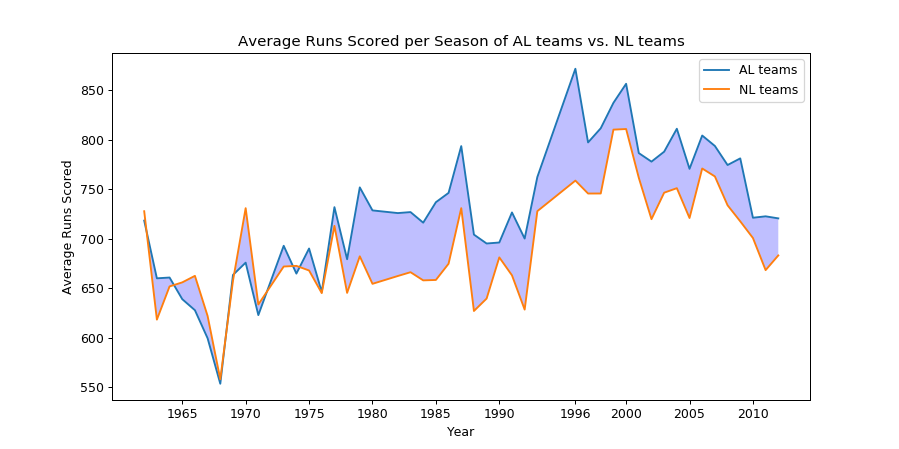

In [3]:
years=df['Year']
AL=df[df['League']=='AL'][['Year','RunsScored']]
NL=df[df['League']=='NL'][['Year','RunsScored']]

import numpy as np
ALaverage=AL.groupby('Year').agg({'RunsScored': np.average})
NLaverage=NL.groupby('Year').agg({'RunsScored': np.average})

%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Average Runs Scored')
ax.set_title('Average Runs Scored per Season of AL teams vs. NL teams')
plt.plot(ALaverage.index,ALaverage['RunsScored'],'-',NLaverage.index,NLaverage['RunsScored'],'-')
ax.legend(['AL teams', 'NL teams','record broken in 2015'])
plt.xticks([1965,1970,1975,1980,1985,1990,1996,2000,2005,2010],rotation=0)
ax.fill_between(ALaverage.index,ALaverage['RunsScored'],NLaverage['RunsScored'], facecolor='blue', alpha=0.25)